Домашняя работа по этому уроку будет выстроена вокруг двух кейсов. Первые три задания — по первому кейсу. Четвертое и пятое задание — по второму.

Общее количество баллов за задания: 106.

В первых трех заданиях вам нужно самому подготовить выборку для возможного воздействия (например, рассылки пушей). Для этого вам в начале нужно сформировать стратифицированную выборку, а после проверить, репрезентативна ли она.

В качестве генеральной совокупности используйте следующий датасет: `homework_task_2.csv`. Обратите внимание, что в данных есть строки с пустыми значениями. Удалите их перед тем, как приступать к следующим заданиям.

В четвертом и пятом заданиях вам нужно будет проверить, есть ли проблемы в уже сформированных выборках. Будем работать с новыми данными: `homework_task_3.csv`

In [1]:
import pandas as pd
import numpy as np
from statsmodels.stats.proportion import proportions_ztest
import scipy.stats as ss

In [2]:
df = pd.read_csv("homework_task_2.csv")

In [3]:
print(df.shape[0], df["passport_id"].isna().sum())

136584 0


In [4]:
df.dropna(inplace=True)

In [5]:
df.shape[0]

130112

Описание данных, на основе которых подготовлены датасеты:

1. Паспорт пользователя (`user_passports`)
- `execution_date`  —  дата, на которую актуальны данные о зарегистрированных пользователях
- `created_at`  — дата регистрации аккаунта пользователя
- `global_id`  — ID пользователя в продукте
- `user_type_cars_name`  — тип кабинета пользователя((a) `cars_simple` — простой кабинет, (b) `cars_seller` — кабинет продавца, (c) `cars_dealer` — кабинет дилера)
- `user_type_cars_id`  — id типа кабинета пользователя((a) 0 — простой кабинет, (b) 6 — кабинет продавца, (c) 7 — кабинет дилера)

2. Размещенные объявления (`dp_live_adverts`) — таблица с оптимизированными данными `live_adverts`

- `execution_date`  — дата, на которую объявление находилось в live
- `advert_id`  — уникальный номер объявления
- `created_at`  — дата, когда было создано объявление
- `price`  — стоимость авто в объявлении
- `region`  — город, в котором продается авто
- `user_id`  — ID пользователя в продукте (global_id в паспорте пользователя)
- `passport_id`  — локальный ID пользователя
- `platform`  — платформа, через которую было размещено объявление((a) `android` — мобильное приложение, android, (b) `ios` — мобильное приложение, ios, (c) `desktop` — подано через сайт, (d) `mobile` — подано в мобильной версии сайта)
- `auto_brand`  — марка авто
- `auto_model`  — модель авто
- `year`  — год выпуска авто
- `userType`  — тип кабинета пользователя на момент размещения объявления в live

3. Транзакции (`user_transaction`)

- `payment_date`  — дата платежа
- `type`  — вид оплачиваемой услуги
- `sign`  — "-1" указывает, что была приобретена услуга и списана оплата
- `amount`  — количество списанных денег

In [6]:
df.head()

,passport_id,region,platform,user_type_cars_name,number_ads,revenue
0,144161634,Санкт-Петербург,android,cars_seller,2,1080
1,132683716,Калининград,android,cars_simple,1,190
2,142653188,Санкт-Петербург,android,cars_seller,1,0
3,124199631,Казань,android,cars_simple,1,190
4,144045240,Казань,android,cars_simple,1,0


### Задание 1
Разделите пользователей на две группы по размеру выручки: платящие (revenue > 0) и неплатящие (revenue = 0). Добавьте эту информацию в новый столбец 'vas'. Найдите среднюю по всему датасету долю платящих.

Введите ответ в поле ниже с точностью до ТРЕХ знаков в десятичной части.

Используйте точку для разделения целой и дробной части.

In [7]:
df["vas"] = df["revenue"].apply(lambda x: 1 if x > 0 else 0)

In [8]:
float(round(df[df["vas"] == 1].shape[0] / df.shape[0], 3))

0.523

### Задание 2 (1/4)
Получите случайную стратифицированную выборку размером ~5% от исходного датасета `homework_task_2` (уже очищенного от данных с пропусками). Для формирования выборки используйте параметр `frac=0.05`.

Необходимо стратифицировать выборку по следующим параметрам `['region', 'platform', 'user_type_cars_name', 'vas']`, сохранив соотношения как в исходном датасете. Порядок указания параметров, по которым мы стратифицируем, стоит оставить таким же, как в задании.

При формировании стратифицированной выборки используйте `np.random.seed(42)`, чтобы у всех получился одинаковый датасет.

In [9]:
# Получим 5%-ю стратифицированную выборку по платформе
np.random.seed(42)
strat_sample_dataset_1 = df.groupby(
    ["region", "platform", "user_type_cars_name", "vas"], group_keys=False
).apply(lambda x: x.sample(frac=0.05))

/var/folders/m6/gnxqn1753_g808tzdcqqmdq80000gn/T/ipykernel_37227/983177164.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ).apply(lambda x: x.sample(frac=0.05))


#### Задание 2 (2/4)
Найдите размер полученной выборки.
Введите ответ в поле ниже в формате целого числа.

In [10]:
strat_sample_dataset_1.shape[0]

6478

#### Задание 2 (3/4)
Найдите средний процент платящих пользователей по стратифицированной выборке.

Введите ответ в поле ниже с точностью до трех знаков в десятичной части.

Используйте точку для разделения целой и дробной части.

In [11]:
float(
    round(
        strat_sample_dataset_1[strat_sample_dataset_1["vas"] == 1].shape[0]
        / strat_sample_dataset_1.shape[0],
        3,
    )
)

0.522

### Задание 2 (4/4)
Найдите долю платформы `android` в стратифицированной выборке.

Введите ответ в поле ниже с точностью до трех знаков в десятичной части.

Используйте точку для разделения целой и дробной части.

In [12]:
strat_sample_dataset_1.head()

,passport_id,region,platform,user_type_cars_name,number_ads,revenue,vas
37149,123719335,Волгоград,android,cars_seller,1,0,0
36801,135496561,Волгоград,android,cars_seller,1,205,1
80767,142257024,Волгоград,android,cars_seller,2,410,1
103975,135092709,Волгоград,android,cars_seller,2,720,1
108591,123972460,Волгоград,android,cars_seller,1,205,1


In [13]:
float(
    round(
        strat_sample_dataset_1[
            strat_sample_dataset_1["platform"] == "android"
        ].shape[0]
        / strat_sample_dataset_1.shape[0],
        3,
    )
)

0.642

### Задание 3 (1/3)

Проверьте полученную выборку на репрезентативность по нескольким параметрам:
- по параметру неплатящих пользователей (`выборка['vas'] = 0`);
- по платформе Андроид (`выборка['platform'] = 'android'`);
- по типу профессионального кабинета cars_seller (`выборка['user_type_cars_name'] = 'cars_seller'`).

Введите значение p-value через `z-тест` с точностью до трех знаков в десятичной части для каждого из параметров в этом и следующих степах.

p-value для проверки по параметру неплатящих пользователей:



In [14]:
strat_sample_dataset_1.head()

,passport_id,region,platform,user_type_cars_name,number_ads,revenue,vas
37149,123719335,Волгоград,android,cars_seller,1,0,0
36801,135496561,Волгоград,android,cars_seller,1,205,1
80767,142257024,Волгоград,android,cars_seller,2,410,1
103975,135092709,Волгоград,android,cars_seller,2,720,1
108591,123972460,Волгоград,android,cars_seller,1,205,1


In [15]:
sample_success = strat_sample_dataset_1[
    strat_sample_dataset_1["vas"] == 0
].shape[0]
sample_size = strat_sample_dataset_1.shape[0]
population_prop = df[df["vas"] == 0].shape[0] / df.shape[0]

z_stat, p_value = proportions_ztest(
    count=sample_success, nobs=sample_size, value=population_prop
)

print(f"Z-статистика: {z_stat:.3f}, p-значение: {p_value:.3f}")

Z-статистика: 0.093, p-значение: 0.926


In [16]:
def sample_representativity_ztest_check(main_df, sample_df, parameter, value):
    """проверка стратифицированной выборки на репрезентативность по выбранному параметру
    main_df - генеральная совокупность
    sample_df - выборка
    parameter - проверяемый параметр
    значение проверяемого параметра  для z-test
    """
    count = np.array(
        [
            len(sample_df[sample_df[parameter] == value]),
            len(main_df[main_df[parameter] == value]),
        ]
    )
    nobs = np.array([len(sample_df), len(main_df)])
    stat, pval = proportions_ztest(count, nobs)
    print("p-value =", "{0:0.3f}".format(pval))

    if pval < 0.05:
        print("выборка по выбранному значению параметра не репрезентативна")
    else:
        print("выборка по выбранному значению параметра репрезентативна")

In [17]:
sample_representativity_ztest_check(df, strat_sample_dataset_1, "vas", 0)

p-value = 0.928
выборка по выбранному значению параметра репрезентативна


### Задание 3 (2/3)
p-value для проверки по платформе Андроид:

In [18]:
sample_representativity_ztest_check(
    df, strat_sample_dataset_1, "platform", "android"
)

p-value = 0.836
выборка по выбранному значению параметра репрезентативна


### Задание 3 (3/3)
p-value для проверки по типу профессионального кабинета:

In [19]:
sample_representativity_ztest_check(
    df, strat_sample_dataset_1, "user_type_cars_name", "cars_seller"
)

p-value = 0.843
выборка по выбранному значению параметра репрезентативна


### Задание 4
Переходим к работе с новым датасетом (`homework_task_3.csv`, скачать данные можно в первом степе). В предложенном датасете пользователи разбиты на контрольную (А) и тестовую группы (B).

Дизайном эксперимента предполагается, что группы представлены в равных пропорциях. Проверьте, присутствует ли в данных нарушение сплитования (SRM) с помощью критерия chi-квадрат.

Присутствует ли нарушение SRM согласно chi-квадрат критерию на уровне значимости alpha = 0.05:

In [20]:
df = pd.read_csv("homework_task_3.csv")

In [21]:
df.head()

,Unnamed: 0,passport_id,region,platform,user_type_cars_name,number_ads,revenue,vas,combined,combined_weight,group
0,105602,136957831,Волгоград,android,cars_seller,1,0,0,"('Волгоград', 'android', 'cars_seller', 0)",0.000007,['A']
1,46619,142530464,Волгоград,android,cars_seller,1,0,0,"('Волгоград', 'android', 'cars_seller', 0)",0.000007,['B']
2,97503,143220356,Волгоград,android,cars_seller,2,0,0,"('Волгоград', 'android', 'cars_seller', 0)",0.000007,['B']
3,35633,137497307,Волгоград,android,cars_seller,1,0,0,"('Волгоград', 'android', 'cars_seller', 0)",0.000007,['A']
4,52222,131622431,Волгоград,android,cars_seller,1,0,0,"('Волгоград', 'android', 'cars_seller', 0)",0.000007,['A']


In [22]:
observed = [
    df[df["group"] == "['A']"].shape[0],
    df[df["group"] == "['B']"].shape[0],
]
ratio = 50
alpha = 0.05

In [23]:
total_traffic = sum(observed)

expected = [
    (total_traffic * ratio) / 100,
    (total_traffic * (100 - ratio) / 100),
]  # ожидаемые размеры групп если бы ratio выполнялось полностью
print("Real sample sizes:", observed)
print("Expected sample sizes:", expected)

chi = ss.chisquare(
    observed, f_exp=expected
)  # считаем результаты точечной оценки доли через хи-квадрат критерий

if chi[1] < alpha:
    print("SRM, присутствует!!!")
else:
    print("SRM отсутствует")
print(chi)

Real sample sizes: [11748, 14270]
Expected sample sizes: [13009.0, 13009.0]
SRM, присутствует!!!
Power_divergenceResult(statistic=244.46475516949803, pvalue=4.180479887875548e-55)


### Задание 5
Используя метод SSRM, рассмотренный в лекции, определите, на каком числе пользователей метод позволит сказать о присутствии SRM для датасета из предыдущего задания.

Для выполнения задания нужно установить модуль `!pip install ssrm-test -q`

Введите ответ в поле ниже. В ответе должно быть целое число.

>**Внимание!**
>
>В нашем учебном датасете мы явно не указываем дату появления пользователя в тесте. Для простоты допускаем, что пользователи уже отсортированы по мере появления в тесте. В реальных данных нужно следить за сохранением последовательности наблюдений в последовательном тестировании.

In [24]:
!pip install ssrm-test -q

In [25]:
from scipy.stats import multinomial

np.random.seed(1)

# Планируемое распределение трафика между группами
p_0 = [0.5, 0.5]

# Реальное распределение трафика между группами
p = [0.51, 0.49]

# Заданное число пользователей (большой размер выбори потребует время для проведения вычислений)
n = 163707

# Получение синтетических данных
data = multinomial.rvs(1, p, size=n)
data

array([[1, 0],
       [0, 1],
       [1, 0],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]])

In [26]:
df

,Unnamed: 0,passport_id,region,platform,user_type_cars_name,number_ads,revenue,vas,combined,combined_weight,group
0,105602,136957831,Волгоград,android,cars_seller,1,0,0,"('Волгоград', 'android', 'cars_seller', 0)",0.000007,['A']
1,46619,142530464,Волгоград,android,cars_seller,1,0,0,"('Волгоград', 'android', 'cars_seller', 0)",0.000007,['B']
2,97503,143220356,Волгоград,android,cars_seller,2,0,0,"('Волгоград', 'android', 'cars_seller', 0)",0.000007,['B']
3,35633,137497307,Волгоград,android,cars_seller,1,0,0,"('Волгоград', 'android', 'cars_seller', 0)",0.000007,['A']
4,52222,131622431,Волгоград,android,cars_seller,1,0,0,"('Волгоград', 'android', 'cars_seller', 0)",0.000007,['A']
...,...,...,...,...,...,...,...,...,...,...,...
26013,115718,137800551,Челябинск,ios,cars_simple,1,715,1,"('Челябинск', 'ios', 'cars_simple', 1)",0.000007,['A']
26014,49803,132964441,Челябинск,ios,cars_simple,1,1365,1,"('Челябинск', 'ios', 'cars_simple', 1)",0.000007,['B']
26015,6330,142012244,Челябинск,ios,cars_simple,1,190,1,"('Челябинск', 'ios', 'cars_simple', 1)",0.000007,['A']
26016,70319,143397390,Челябинск,ios,cars_simple,1,360,1,"('Челябинск', 'ios', 'cars_simple', 1)",0.000007,['B']


In [27]:
df["group_a"] = df["group"].apply(lambda x: 1 if "['A']" in x else 0)
df["group_b"] = df["group"].apply(lambda x: 1 if "['B']" in x else 0)

In [28]:
data = df[["group_a", "group_b"]]

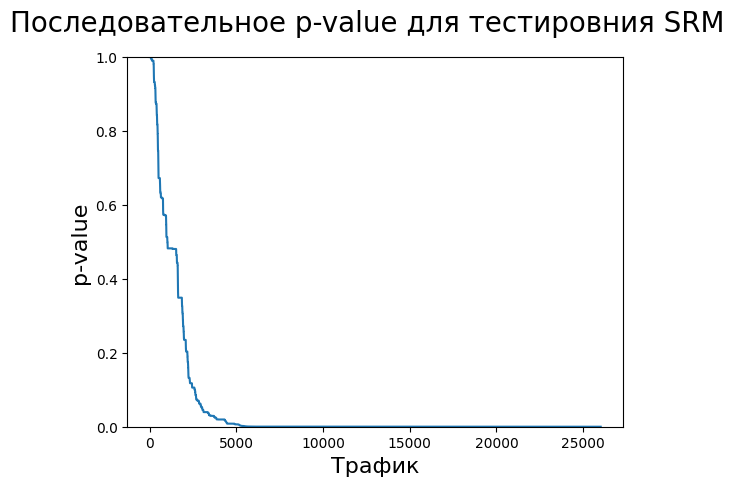

In [31]:
from ssrm_test import ssrm_test
import matplotlib.pyplot as plt

p_0 = [0.5, 0.5]
n = df["passport_id"].nunique()

pvals = ssrm_test.sequential_p_values(data.values, p_0)
fig = plt.figure()
plt.plot(pvals)
fig.suptitle("Последовательное p-value для тестировния SRM", fontsize=20)
plt.xlabel("Трафик", fontsize=16)
plt.ylabel("p-value", fontsize=16)
plt.ylim(0, 1)
plt.show()

In [32]:
sig_reached = np.argmax(np.array(pvals) < 0.05)
print(
    "SSRM отклонило нулевую гипотезу об отсутствии SRM при уровне значимости alpha=0.05 после {} пользователей".format(
        sig_reached
    )
)
print(
    "Это {}% от общего числа пользователей для этого эксперимента".format(
        round(100 * sig_reached / n), 3
    )
)

SSRM отклонило нулевую гипотезу об отсутствии SRM при уровне значимости alpha=0.05 после 3023 пользователей
Это 12% от общего числа пользователей для этого эксперимента
